In [ ]:
pip install pyLDAvis

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nltk.corpus import stopwords 
import re 
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.models import LdaMulticore
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import pandas as pd
nltk.download('stopwords')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Read the CSV file into a pandas DataFrame
papers = pd.read_csv("/content/drive/MyDrive/Topic_Modelling_Dataset/papers.csv")

# Print head
papers.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [ ]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,year,title,abstract,paper_text
2188,2006,Optimal Single-Class Classification Strategies,Abstract Missing,Optimal Single-Class Classification Strategies...
681,1998,Basis Selection for Wavelet Regression,Abstract Missing,Basis Selection For Wavelet Regression\n\nKevi...
5685,2016,Higher-Order Factorization Machines,Factorization machines (FMs) are a supervised ...,Higher-Order Factorization Machines\nMathieu B...
4572,2013,One-shot learning and big data with n=2,"We model a one-shot learning"" situation, where...",One-shot learning and big data with n = 2\n\nD...
5055,2014,Learning Chordal Markov Networks by Dynamic Pr...,We present an algorithm for finding a chordal ...,Learning Chordal Markov Networks\nby Dynamic P...


In [ ]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:6: DeprecationWarning: invalid escape sequence \.
<>:6: DeprecationWarning: invalid escape sequence \.
<ipython-input-6-9f446a52f1dd>:6: DeprecationWarning: invalid escape sequence \.
  papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))


2188    optimal single-class classification strategies...
681     basis selection for wavelet regression\n\nkevi...
5685    higher-order factorization machines\nmathieu b...
4572    one-shot learning and big data with n = 2\n\nd...
5055    learning chordal markov networks\nby dynamic p...
Name: paper_text_processed, dtype: object

In [ ]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:6: DeprecationWarning: invalid escape sequence \.
<>:6: DeprecationWarning: invalid escape sequence \.
<ipython-input-7-9f446a52f1dd>:6: DeprecationWarning: invalid escape sequence \.
  papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))


2188    optimal single-class classification strategies...
681     basis selection for wavelet regression\n\nkevi...
5685    higher-order factorization machines\nmathieu b...
4572    one-shot learning and big data with n = 2\n\nd...
5055    learning chordal markov networks\nby dynamic p...
Name: paper_text_processed, dtype: object

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


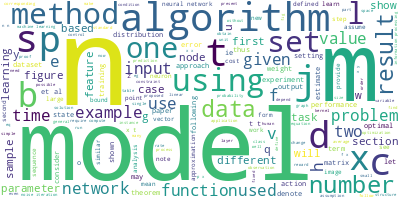

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['optimal', 'single', 'class', 'classification', 'strategies', 'ran', 'el', 'yaniv', 'department', 'computer', 'science', 'technion', 'israel', 'institute', 'technology', 'technion', 'israel', 'rani', 'cstechnionacil', 'mordechai', 'nisenson', 'department', 'computer', 'science', 'technion', 'israel', 'institute', 'technology', 'technion', 'israel']


In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 2), (2, 1), (3, 1), (4, 5), (5, 2), (6, 2), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 33), (16, 4), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 5), (26, 1), (27, 3), (28, 1), (29, 7)]


In [ ]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.006*"learning" + 0.005*"algorithm" + 0.005*"model" + 0.004*"set" + '
  '0.004*"time" + 0.004*"using" + 0.004*"one" + 0.003*"number" + '
  '0.003*"function" + 0.003*"information"'),
 (1,
  '0.008*"learning" + 0.006*"algorithm" + 0.005*"data" + 0.004*"function" + '
  '0.004*"using" + 0.004*"one" + 0.003*"model" + 0.003*"number" + '
  '0.003*"models" + 0.003*"time"'),
 (2,
  '0.006*"learning" + 0.005*"data" + 0.004*"algorithm" + 0.004*"model" + '
  '0.004*"time" + 0.003*"function" + 0.003*"set" + 0.003*"two" + 0.003*"using" '
  '+ 0.003*"number"'),
 (3,
  '0.007*"learning" + 0.006*"model" + 0.005*"algorithm" + 0.004*"set" + '
  '0.004*"data" + 0.003*"two" + 0.003*"using" + 0.003*"function" + '
  '0.003*"results" + 0.003*"training"'),
 (4,
  '0.005*"model" + 0.004*"data" + 0.004*"learning" + 0.004*"algorithm" + '
  '0.004*"function" + 0.004*"time" + 0.004*"using" + 0.004*"number" + '
  '0.003*"neural" + 0.003*"set"')]


In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import os
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/content/drive/MyDrive/Topic_Modelling_Dataset/results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '/content/drive/MyDrive/Topic_Modelling_Dataset/results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.006431 -0.000437       1        1  31.024853
1     -0.002191 -0.004023       2        1  25.906051
3      0.002181 -0.000113       3        1  24.342292
2     -0.004397 -0.001476       4        1   9.643370
4     -0.002024  0.006049       5        1   9.083433, topic_info=          Term         Freq        Total Category  logprob  loglift
943       data  1018.000000  1018.000000  Default  30.0000  30.0000
1749      time   837.000000   837.000000  Default  29.0000  29.0000
486      model  1112.000000  1112.000000  Default  28.0000  28.0000
505     neural   613.000000   613.000000  Default  27.0000  27.0000
305   function   842.000000   842.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
1066    models    51.346959   623.240172   Topic5  -6.0552  -0.0976
599    problem    46.563335   676.003341   Topic5  -6.1530  -0.2767
1554    matrix    45.642424   655.441840   Topic5  -6.1730  -0.2658
674    results    44.935940   621.299854   Topic5  -6.1886  -0.2279
286      first    43.325385   572.027837   Topic5  -6.2251  -0.1817

[462 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
7574      1  0.204420  acos
7574      2  0.511051  acos
7574      3  0.102210  acos
7574      4  0.102210  acos
7574      5  0.102210  acos
...     ...       ...   ...
2232      1  0.212615   yor
2232      2  0.425229   yor
2232      3  0.141743   yor
2232      4  0.070872   yor
2232      5  0.070872   yor

[1414 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3, 5])

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -8.217893974630137

Coherence Score:  0.2476130032971154


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=2, limit=50, step=1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


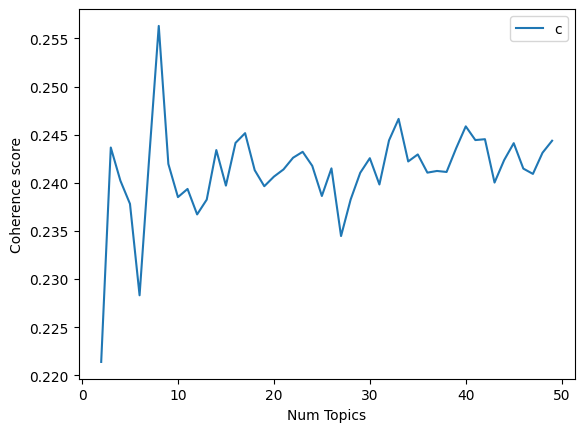

In [ ]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2214
Num Topics = 3  has Coherence Value of 0.2437
Num Topics = 4  has Coherence Value of 0.2402
Num Topics = 5  has Coherence Value of 0.2378
Num Topics = 6  has Coherence Value of 0.2283
Num Topics = 7  has Coherence Value of 0.2426
Num Topics = 8  has Coherence Value of 0.2563
Num Topics = 9  has Coherence Value of 0.242
Num Topics = 10  has Coherence Value of 0.2385
Num Topics = 11  has Coherence Value of 0.2394
Num Topics = 12  has Coherence Value of 0.2367
Num Topics = 13  has Coherence Value of 0.2383
Num Topics = 14  has Coherence Value of 0.2434
Num Topics = 15  has Coherence Value of 0.2397
Num Topics = 16  has Coherence Value of 0.2441
Num Topics = 17  has Coherence Value of 0.2452
Num Topics = 18  has Coherence Value of 0.2413
Num Topics = 19  has Coherence Value of 0.2396
Num Topics = 20  has Coherence Value of 0.2406
Num Topics = 21  has Coherence Value of 0.2414
Num Topics = 22  has Coherence Value of 0.2426
Num Topics = 23  has C

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install PyPDF2

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 KB 9.1 MB/s eta 0:00:00


In [ ]:
!pip install textract

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 27.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.5/128.5

In [ ]:
import PyPDF2
import textract
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
nltk.download('punkt')

# Open the PDF file and extract the text
pdf_file = open('/content/drive/MyDrive/Research_Papers/VideoSumSpringer.pdf', 'rb')
pdf_reader = PyPDF2.PdfReader(pdf_file)
text = ''
for page in pdf_reader.pages:
    text += page.extract_text()
pdf_file.close()

# Preprocess the text by removing stopwords and punctuation
stop_words = set(stopwords.words('english'))
cleaned_text = [word for word in nltk.word_tokenize(text.lower()) if word.isalpha() and word not in stop_words]

# Convert the text into a bag of words using CountVectorizer
vectorizer = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
bag_of_words = vectorizer.fit_transform(cleaned_text)

# Perform topic modeling using LatentDirichletAllocation
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=50, learning_method='online')
lda.fit(bag_of_words)

# # Print the top 10 topics and their most frequent words
# for topic_idx, topic in enumerate(lda.components_):
#     print("Topic {}: {}".format(topic_idx, " ".join([vectorizer.vocabulary_.keys()[i] for i in topic.argsort()[:-11:-1]])))

feature_names = list(vectorizer.vocabulary_.keys())

def print_topics(model, feature_names, top_n=5):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(feature_names[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]])

print_topics(lda, feature_names)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic 0:
[('tuning', 21.81810931439424), ('guide', 5.815046453924928), ('blueprint', 5.806158767816404), ('youtube', 5.016455339627555), ('subtitles', 4.903259766403979)]
Topic 1:
[('expert', 36.574323550210366), ('introduction', 20.454493523241222), ('paper', 16.421980315357082), ('proposes', 10.496157530863954), ('hugging', 7.646813872233397)]
Topic 2:
[('evaluating', 19.0786744086562), ('predictions', 15.589016884153754), ('little', 14.4486880796987), ('package', 8.885095207459724), ('focused', 8.843940460550753)]
Topic 3:
[('tips', 16.603821890783497), ('used', 13.37820304793702), ('url', 12.847845883805677), ('import', 10.44182435651155), ('http', 7.76985395885494)]
Topic 4:
[('feet', 23.672570893679563), ('recognition', 17.07767518207478), ('based', 10.089196064358067), ('figure', 8.525163396469011), ('datablock', 7.963221871292434)]
Topic 5:
[('core', 19.26340601177225), ('lin', 15.712015438252045), ('entire', 15.580808773821001), ('summarising', 11.0562082271789), ('tools', 6.5

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(

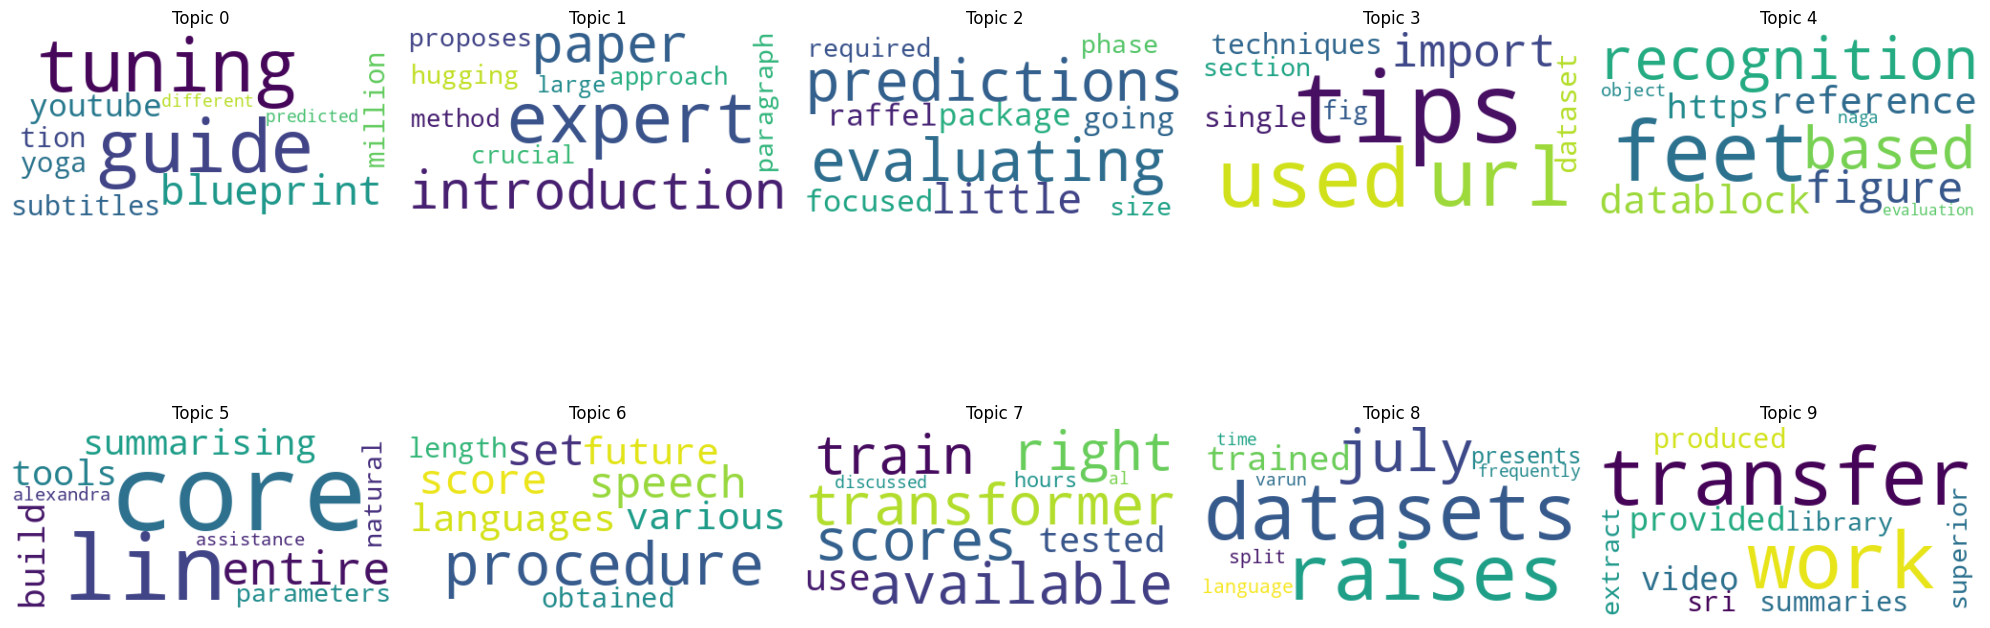

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a WordCloud object for each topic
wordclouds = []
for topic_idx, topic in enumerate(lda.components_):
    words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    wordclouds.append(WordCloud(background_color="white").generate(" ".join(words)))
    
# Plot the word clouds
fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i < num_topics:
        ax.imshow(wordclouds[i], interpolation='bilinear')
        ax.set_title("Topic {}".format(i))
        ax.axis("off")
        
plt.tight_layout()
plt.show()

###**Using BERT**

In [ ]:
!python -m gensim.downloader --download scientific

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Traceback (most recent call last):
  File "/usr/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.9/dist-packages/gensim/downloader.py", line 529, in <module>
    data_path = load(args.download[0], return_path=True)
  File "/usr/local/lib/python3.9/dist-packages/gensim/downloader.py", line 492, in load
    raise ValueError("Incorrect model/corpus name")
ValueError: Incorrect model/corpus name


In [ ]:
!pip install transformers

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 15.7 MB/s eta 0:00:00


In [ ]:
# Import required libraries
import numpy as np
import torch
import gensim
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from sklearn.cluster import AgglomerativeClustering
from transformers import AutoTokenizer, AutoModel
from gensim.downloader import load
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
nltk.download('stopwords')
nltk.download('wordnet')

# Load pre-trained SciBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased')
model = AutoModel.from_pretrained('allenai/scibert_scivocab_uncased')

# Read the CSV file into a pandas DataFrame
papers = pd.read_csv("/content/drive/MyDrive/Topic_Modelling_Dataset/papers.csv")

# Print head
papers.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predicti

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [ ]:
# Extract list of documents from the dataset
documents = papers['abstract']
documents

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       Abstract Missing
1       Abstract Missing
2       Abstract Missing
3       Abstract Missing
4       Abstract Missing
              ...       
7236    Abstract Missing
7237    Abstract Missing
7238    Abstract Missing
7239    Abstract Missing
7240    Abstract Missing
Name: abstract, Length: 7241, dtype: object

In [ ]:
# Preprocess the data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
documents_preprocessed = []
for document in documents:
    tokens = tokenizer.tokenize(document.lower())
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    documents_preprocessed.append(tokens)

# Fine-tune BERT using clustering algorithm
# Extract BERT embeddings for each document
embeddings = []
for document in documents_preprocessed:
    input_ids = torch.tensor(tokenizer.encode(' '.join(document), add_special_tokens=True)).unsqueeze(0)
    outputs = model(input_ids)
    embeddings.append(outputs[0].detach().numpy())

# Cluster embeddings using Agglomerative Clustering algorithm
num_topics = 10
agg_clustering = AgglomerativeClustering(n_clusters=num_topics).fit(np.array(embeddings))

# Print out the top words in each topic
dictionary = Dictionary(documents_preprocessed)
for i in range(num_topics):
    topic = np.array(documents)[agg_clustering.labels_ == i]
    topic_preprocessed = np.array(documents_preprocessed)[agg_clustering.labels_ == i]
    topic_embeddings = np.array(embeddings)[agg_clustering.labels_ == i]
    topic_embeddings_mean = np.mean(topic_embeddings, axis=0)
    top_words_idx = np.argsort(topic_embeddings_mean)[::-1][:10]
    top_words = [dictionary[i] for i in top_words_idx]
    print(f"Topic {i}: {', '.join(top_words)}")

# Calculate perplexity and coherence scores
corpus = [dictionary.doc2bow(document) for document in documents_preprocessed]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)
perplexity_score = lda_model.log_perplexity(corpus)
coherence_model = CoherenceModel(model=lda_model, texts=documents_preprocessed, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f"Perplexity: {perplexity_score}")
print(f"Coherence: {coherence_score}")

# Visualize the topics
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-63-df57267f0d33>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  agg_clustering = AgglomerativeClustering(n_clusters=num_topics).fit(np.array(embeddings))


ValueError: ignored